# Iris flower classification

In this ML tutorial, we will explore probably the most famous data set for data analysis - the Iris data set (also known as the "Hello, world" of machine learning).

The Iris data set is basically a table with four numbers (the width and the length of the sepals and petals), the so-called "features" or "attributes", and the name of the specific Iris species or classes. It consists of 150 instances. 

In this tutorial, we want to train a model to predict the class given the features (i.e. width and length of sepals and petals). We can also say, the "target variable", or the desired output, is the species of the Iris. This model should perform within a given accuracy for new data.

This data set is perfectly suitable to start your ML career, because it has a well balanced class distribution and there are no missing data. This means you do not need to invest any time in data preparation. Good data preparation is usually one of the most important steps in data analysis, and the many possibilities and complexities can be very overwhelming for a beginner. 

So, let's get started. :) 

First, we need to import some packages.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score # for cross-validation score
from sklearn.model_selection import StratifiedKFold # k-fold for cross-validation score
from sklearn import svm # support vector machine algorithm
from sklearn.neighbors import KNeighborsClassifier # K neareast neighbours algorithm
from sklearn.linear_model import LogisticRegression # logistic regression algorithm
from sklearn.tree import DecisionTreeClassifier # decision tree algorithm
from sklearn import metrics # for evaluating the model

# Iris data set

Now we need our data set, which is available online on the UC Irvine Machine Learning Repository. We define the path and insert this path in the command `read_csv` from the pandas package. We also specify the names of the columns in the `read_csv` command. This organizes the output a bit better and we can access the individual columns via these names. 

In [2]:
path_to_data = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
iris = pd.read_csv(path_to_data, names = columns)

Let's have a first look into the data.

In [3]:
print(iris)

     sepal_length  sepal_width  petal_length  petal_width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


So, let's check the minimum and maximum values of the sepal lengths. 

In [4]:
iris['sepal_length'].max()

7.9

In [5]:
iris['sepal_length'].min()

4.3

You can use the methods `describe` and `info` to get more information about your data. This is specifically useful to get e.g. the number of instancec, some statistical values and information about null values in the data. 

In [6]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
iris['class'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: class, dtype: int64

# Splitting into training and test set

Ok, now we know a bit more about the data set. We see that there are no missing data, no NaNs or other corrupted data points. Next, let's split our data set into training and test sets.

In [9]:
train, test = train_test_split(iris, test_size = 0.3)

The keyword *test_size* gives the percentage of data that should be withhold for the test set.

In [10]:
train.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,105.000000,105.000000,105.000000,105.000000
mean,5.830476,3.066667,3.743810,1.199048
std,0.828358,0.440862,1.739967,0.742462
min,4.300000,2.000000,1.100000,0.100000
25%,5.100000,2.800000,1.500000,0.300000
50%,5.800000,3.000000,4.400000,1.400000
75%,6.400000,3.400000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
test.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,45.000000,45.000000,45.000000,45.000000
mean,5.873333,3.024444,3.793333,1.197778
std,0.835953,0.419499,1.839763,0.818116
min,4.400000,2.200000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,6.000000,3.000000,4.200000,1.300000
75%,6.500000,3.200000,5.600000,1.800000
max,7.600000,3.900000,6.600000,2.500000


In [12]:
train['class'].value_counts()

Iris-versicolor    38
Iris-setosa        34
Iris-virginica     33
Name: class, dtype: int64

We see that the distribution of the classes in the training set does not 
resemble the distribution in the original data set, where all of the different Iris species are equally distributed. We can use the keyword *stratify* 
in `train_test_split` to ensure the same distribution.

In [13]:
train, test = train_test_split(iris, test_size = 0.3, stratify = iris['class'])

In [14]:
train['class'].value_counts()

Iris-setosa        35
Iris-virginica     35
Iris-versicolor    35
Name: class, dtype: int64

Save each class in an individual variable - it's more comfortable to access the different classes this way. 

In [15]:
setosa = train[train['class']=='Iris-setosa']
virginica = train[train['class']=='Iris-virginica']
versicolor = train[train['class']=='Iris-versicolor']

We can here apply the same methods (`describe` and `info`) as previously. 

In [16]:
setosa.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,35.000000,35.000000,35.000000,35.000000
mean,5.054286,3.440000,1.457143,0.234286
std,0.359201,0.398674,0.166779,0.093755
min,4.400000,2.300000,1.000000,0.100000
25%,4.800000,3.200000,1.400000,0.200000
50%,5.000000,3.400000,1.500000,0.200000
75%,5.250000,3.650000,1.500000,0.300000
max,5.800000,4.400000,1.900000,0.500000


# Plotting the data

Now let's make some plots to get a better feeling for the Iris data.

First, we will make two scatter plots - the sepal length versus the sepal width, and the petal length versus the petal width. We will also color the species differently.

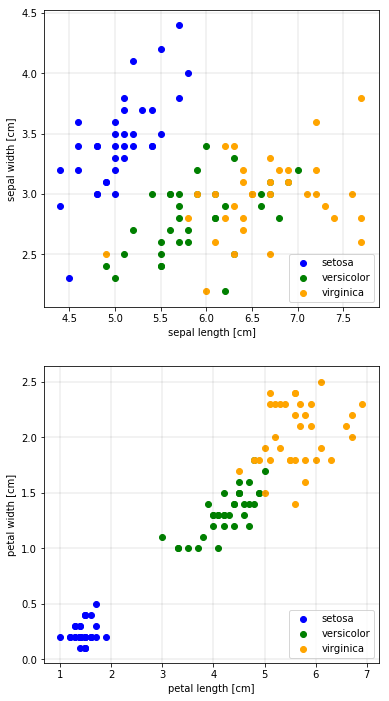

In [17]:
fig = plt.figure(figsize=(6,12))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.scatter(setosa['sepal_length'], setosa['sepal_width'], c='b', label='setosa')
ax1.scatter(versicolor['sepal_length'], versicolor['sepal_width'], c='g', label='versicolor')
ax1.scatter(virginica['sepal_length'], virginica['sepal_width'], c='orange', label='virginica')
ax1.set_xlabel('sepal length [cm]')
ax1.set_ylabel('sepal width [cm]')
ax1.legend(loc='lower right')

ax2.scatter(setosa['petal_length'], setosa['petal_width'], c='b', label='setosa')
ax2.scatter(versicolor['petal_length'], versicolor['petal_width'], c='g', label='versicolor')
ax2.scatter(virginica['petal_length'], virginica['petal_width'], c='orange', label='virginica')
ax2.set_xlabel('petal length [cm]')
ax2.set_ylabel('petal width [cm]')
ax2.legend(loc='lower right');

ax1.grid(True, linewidth=0.1, color='#000000', linestyle='-')
ax2.grid(True, linewidth=0.1, color='#000000', linestyle='-')

plt.show()

In the petal plot, we can clearly see three clusters. It seems that the petal features are better suited to distinguish the species than the sepal features.

Let's have a look at the distribution of the four features with histograms.

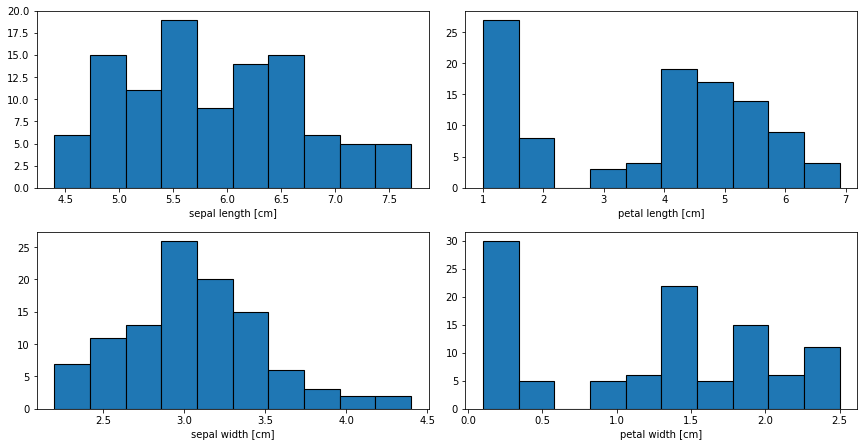

In [18]:
n_bins = 10
fig2 = plt.figure(figsize=(12,12))
ax3 = fig2.add_subplot(421)
ax4 = fig2.add_subplot(422)
ax5 = fig2.add_subplot(423)
ax6 = fig2.add_subplot(424)

ax3.hist(train['sepal_length'], bins=n_bins, edgecolor='black', linewidth=1.1);
ax3.set_xlabel('sepal length [cm]')

ax4.hist(train['petal_length'], bins=n_bins, edgecolor='black', linewidth=1.1);
ax4.set_xlabel('petal length [cm]')

ax5.hist(train['sepal_width'], bins=n_bins, edgecolor='black', linewidth=1.1);
ax5.set_xlabel('sepal width [cm]')

ax6.hist(train['petal_width'], bins=n_bins, edgecolor='black', linewidth=1.1);
ax6.set_xlabel('petal width [cm]')

fig2.tight_layout(pad=1.0);

plt.show()

Again, we see that there is a group of smaller values for the petal lengths and widths. 
For the last plot, let's plot a so called violin plot.

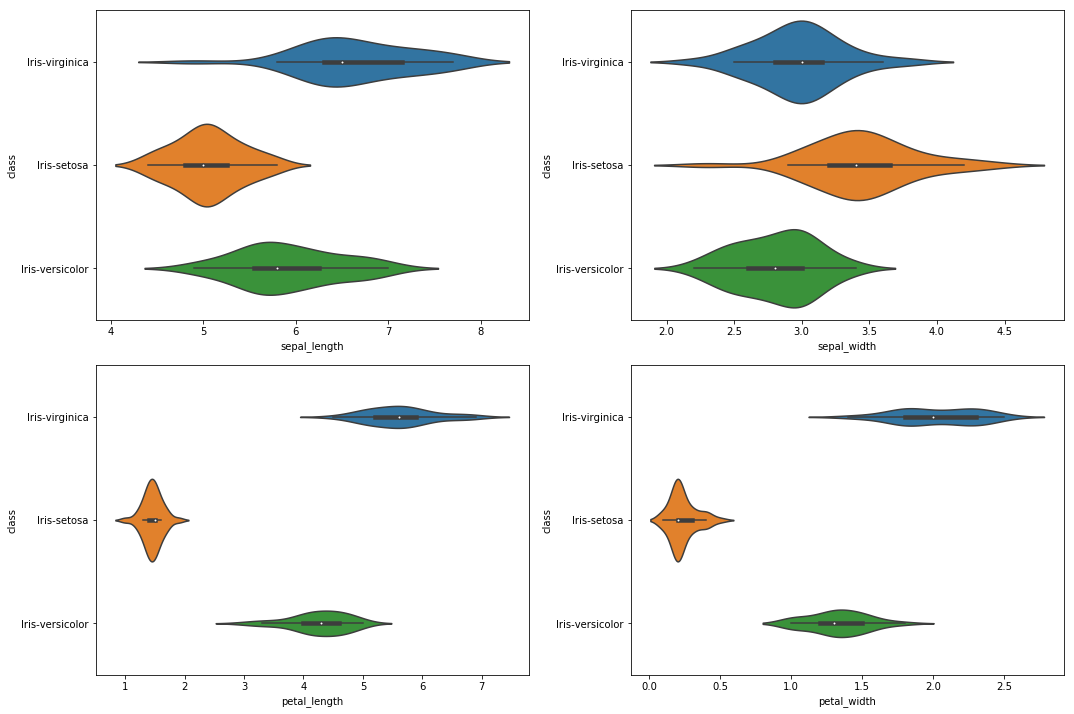

In [19]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(y='class', x='sepal_length', data=train, innter='quartile')
plt.subplot(2,2,2)
sns.violinplot(y='class', x='sepal_width', data=train, innter='quartile')
plt.subplot(2,2,3)
sns.violinplot(y='class', x='petal_length', data=train, innter='quartile')
plt.subplot(2,2,4)
sns.violinplot(y='class', x='petal_width', data=train, innter='quartile')
plt.tight_layout(pad=1.0);

And again, we recognize that Iris setosa has the lowest values for petal lengths and widths. 

# Correlation and feature selection

Correlation between the features plays an important role. If there are many correlated features, then it is not advised to take all of the features for training the algorithm, since this reduces the accuracy of the model. Feature selection before training an algorithm is a very important step. 

Let's have a look at the correlation matrix for our training data set. To get the correlation, we use the method `corr` on our data set. To plot the correlation matrix, we use `heatmap` from the *seaborn* package.


In [20]:
train_corr = train.corr()
print(train_corr['sepal_length'].sort_values(ascending=False))

sepal_length    1.000000
petal_length    0.869934
petal_width     0.811898
sepal_width    -0.134003
Name: sepal_length, dtype: float64


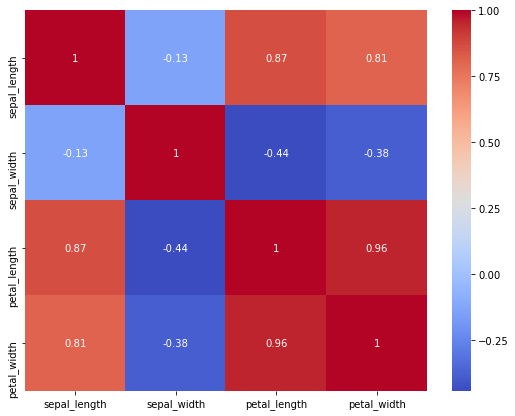

In [21]:
plt.figure(figsize=(9, 7))
sns.heatmap(train_corr, annot=True, cmap='coolwarm')

We see that the sepal features are not correlated with each other, whereas the petal features are. High correlation between features presents redundant information, which increases the dimensionality without providing valuable information. This usually reduces the accuracy of a trained model. 

As a first step, let's train the model with all of the features. Then we make a selection of the features and investigate the effects on the outcome. 

# Algorithms

Pythons's *sklearn* provides many algorithms for different purposes. We show here only a few of the available algorithms suitable for classification problem. 

First, let's specify the feature vector, usually denoted with X (= independent variables), and the label vector, usually denoted with y (= dependent variables). 

In [22]:
X_train = train[['sepal_length','sepal_width','petal_length','petal_width']] 
y_train = train['class']

print(X_train.shape,y_train.shape)

X_test = test[['sepal_length','sepal_width','petal_length','petal_width']]
y_test = test['class']

print(X_test.shape,y_test.shape)

(105, 4) (105,)
(45, 4) (45,)


Next, let's train our models and make some predictions. 

To train the model, we will use the `fit` method. This will be done on the training data, X_train, and the training output, y_train. To make a prediction with the trained model, we will then use the `predict` method, which will be done on the test data, X_test.  

## Support Vector Machine - SVM

In [23]:
model_svm = svm.SVC(gamma='auto') # specify the model/algorithm
model_svm.fit(X_train, y_train) # train the model with the training data
y_pred_svm = model_svm.predict(X_test) # make the prediction with the test data

print('%s: %f' %('accuracy (SVM)', metrics.accuracy_score(y_test, y_pred_svm)))

kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=False)
cv_score_svm = cross_val_score(model_svm, X_train, y_train, scoring='accuracy', cv=kfold)

print('%s: %f (%f)' %('accuracy cross-validation (standard deviation)', cv_score_svm.mean(), cv_score_svm.std()))

accuracy (SVM): 0.955556
accuracy cross-validation (standard deviation): 0.961905 (0.035635)


The accuracy of the prediction can be calculated with `accuracy_score` and can be used for a somehow final evaluation on how good your model is. 

If we are interested in the cross-validation score, we can use `StratifiedKFold` to generate *n_splits* of the training set and then calculate an accuracy with `cross_val_score`. We get an accuracy for each of the folds and can then also do some statistics (e.g. *mean* or *standard deviation*) on these results.

Just a few words on accuracy: The *accuracy* value is not always indicative of a good model and its *performance*. The *accuracy* of a model can be really good, but the model *performance* might not be that good. This might especially be true for imbalanced data sets, but also for balanced ones. There are nice discussions on this topic throughout the internet. 

All in all, it is never wrong to use different metrics for comparing models and for evaluating their accuracies and performances. 

In [24]:
cls = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
conf_mat = metrics.confusion_matrix(y_pred_svm, y_test, labels=cls)
print(conf_mat)

[[15  0  0]
 [ 0 14  1]
 [ 0  1 14]]


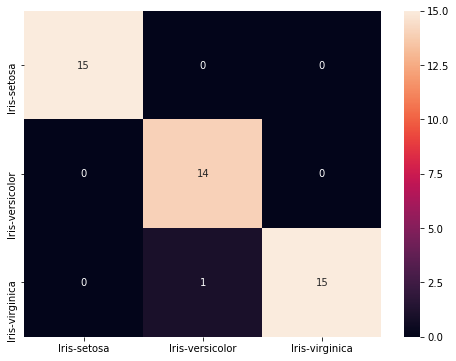

In [39]:
df_cm = pd.DataFrame(conf_mat, index = [i for i in cls],
                  columns = [i for i in cls])
plt.figure(figsize = (8,6))
sns.heatmap(df_cm, annot=True)

In [26]:
print(metrics.classification_report(y_pred_svm, y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.93      0.93      0.93        15
 Iris-virginica       0.93      0.93      0.93        15

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



## Logistic Regression

In [27]:
model_lr = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

print('%s: %f' %('accuracy (Logistic Regression)', metrics.accuracy_score(y_test, y_pred_lr)))

kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=False)
cv_score_lr = cross_val_score(model_lr, X_train, y_train, scoring='accuracy', cv=kfold)
print('%s: %f (%f)' %('accuracy cross-validation (standard deviation)', cv_score_lr.mean(), cv_score_lr.std()))

accuracy (Logistic Regression): 0.977778
accuracy cross-validation (standard deviation): 0.961905 (0.019048)


In [28]:
print(metrics.classification_report(y_pred_lr, y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.93      1.00      0.97        14
 Iris-virginica       1.00      0.94      0.97        16

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



## Decision Tree

In [29]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)

print('%s: %f' %('accuracy (Decision Tree)', metrics.accuracy_score(y_test, y_pred_dt)))

kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=False)
cv_score_dt = cross_val_score(model_dt, X_train, y_train, cv=kfold)
print('%s: %f (%f)' %('accuracy cross-validation (standard deviation)', cv_score_dt.mean(), cv_score_dt.std()))

accuracy (Decision Tree): 0.977778
accuracy cross-validation (standard deviation): 0.933333 (0.057143)


In [30]:
print(metrics.classification_report(y_pred_dt, y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.93      1.00      0.97        14
 Iris-virginica       1.00      0.94      0.97        16

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



## K-nearest Neighbors

In [31]:
model_knn = KNeighborsClassifier() # default: n_neighbors = 5
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)

print('%s: %f' %('accuracy (K-nearest Neighbors)', metrics.accuracy_score(y_test, y_pred_knn)))

kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=False)
cv_score_knn = cross_val_score(model_knn, X_train, y_train, cv=kfold)
print('%s: %f (%f)' %('accuracy cross-validation (standard deviation)', cv_score_knn.mean(), cv_score_knn.std()))

accuracy (K-nearest Neighbors): 0.977778
accuracy cross-validation (standard deviation): 0.942857 (0.046657)


In [32]:
print(metrics.classification_report(y_pred_knn, y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.93      1.00      0.97        14
 Iris-virginica       1.00      0.94      0.97        16

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [33]:
model_knn = KNeighborsClassifier(n_neighbors = 4) # default: n_neighbors = 5
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)

print('%s: %f' %('accuracy (K-nearest Neighbors)', metrics.accuracy_score(y_test, y_pred_knn)))

kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=False)
cv_score_knn = cross_val_score(model_knn, X_train, y_train, cv=kfold)
print('%s: %f (%f)' %('accuracy cross-validation (standard deviation)', cv_score_knn.mean(), cv_score_knn.std()))

accuracy (K-nearest Neighbors): 0.977778
accuracy cross-validation (standard deviation): 0.952381 (0.042592)


In [34]:
print(metrics.classification_report(y_pred_knn, y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.93      1.00      0.97        14
 Iris-virginica       1.00      0.94      0.97        16

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [35]:
cls = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
conf_mat = metrics.confusion_matrix(y_pred_knn, y_test, labels=cls)
print(conf_mat)

[[15  0  0]
 [ 0 14  0]
 [ 0  1 15]]


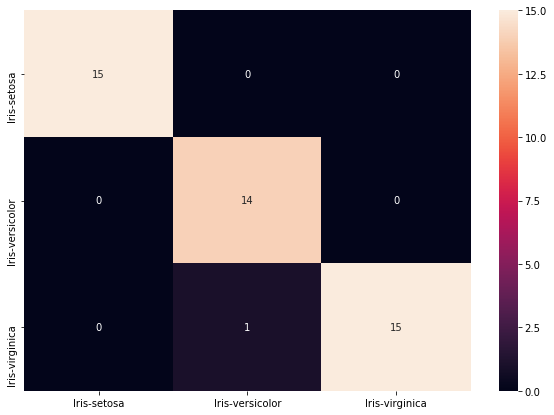

In [36]:
df_cm = pd.DataFrame(conf_mat, index = [i for i in cls],
                  columns = [i for i in cls])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)